In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

In [ ]:
class BanditProblem:
    def __init__(self, k=10):
        self.k = k
       
        self.q_star = np.random.normal(0, 1, k)
       
        self.optimal_action = np.argmax(self.q_star)

    def get_reward(self, action):
       
        return self.q_star[action] + np.random.normal(0, 1)

In [ ]:
def run_ucb_agent(runs=2000, steps=1000, c=2):
    avg_rewards = np.zeros(steps)
    
    for r in range(runs):
        bandit = BanditProblem()
        Q = np.zeros(bandit.k)  
        N = np.zeros(bandit.k)  
        
        
        run_rewards = []
        
        for t in range(1, steps + 1):
           
            if t <= bandit.k:
               
                action = t - 1
            else:
                
                uncertainty = c * np.sqrt(np.log(t) / N)
                action = np.argmax(Q + uncertainty)
            
           
            reward = bandit.get_reward(action)
            N[action] += 1
           
            Q[action] += (1.0 / N[action]) * (reward - Q[action])
            
            run_rewards.append(reward)
        
       
        avg_rewards += np.array(run_rewards)
        
    return avg_rewards / runs

In [ ]:
def run_epsilon_greedy_agent(runs=2000, steps=1000, epsilon=0.1):
    avg_rewards = np.zeros(steps)
    
    for r in range(runs):
        bandit = BanditProblem()
        Q = np.zeros(bandit.k)
        N = np.zeros(bandit.k)
        
        run_rewards = []
        
        for t in range(1, steps + 1):
            
            if np.random.rand() < epsilon:
                action = np.random.randint(bandit.k)
            else:
                
                max_q = np.max(Q)
                
                candidates = np.where(Q == max_q)[0]
                action = np.random.choice(candidates)
            
            
            reward = bandit.get_reward(action)
            N[action] += 1
            Q[action] += (1.0 / N[action]) * (reward - Q[action])
            
            run_rewards.append(reward)
            
        avg_rewards += np.array(run_rewards)
        
    return avg_rewards / runs

In [ ]:

runs = 2000
steps = 1000

print("Simulating UCB (c=2)...")
ucb_rewards = run_ucb_agent(runs, steps, c=2)

print("Simulating Epsilon-Greedy (epsilon=0.1)...")
eps_rewards = run_epsilon_greedy_agent(runs, steps, epsilon=0.1)

Simulating UCB (c=2)...
Simulating Epsilon-Greedy (epsilon=0.1)...


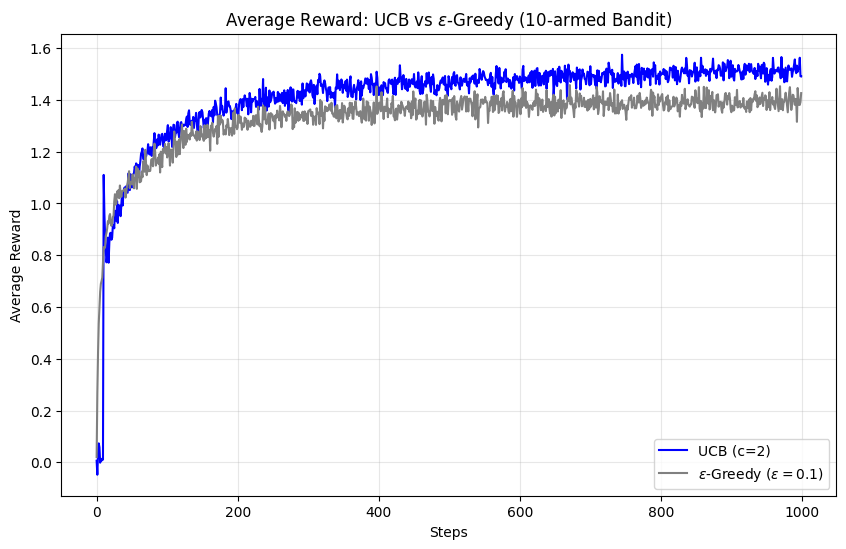

In [ ]:
plt.figure(figsize=(10, 6))


plt.plot(ucb_rewards, label='UCB (c=2)', color='blue')


plt.plot(eps_rewards, label=r'$\epsilon$-Greedy ($\epsilon=0.1$)', color='gray')


plt.xlabel('Steps')
plt.ylabel('Average Reward')


plt.title(r'Average Reward: UCB vs $\epsilon$-Greedy (10-armed Bandit)')


plt.legend()
plt.grid(True, alpha=0.3)
plt.show()